In [15]:
import pandas as pd
import os
from scipy import stats
import numpy as np
from collections import defaultdict


USE_ABSOLUTE = True # this is because values closer to 0 are desired according to Lee et al

results_dir = '../data/results/empathy_eval_results/'
files = ['preds_dlrxxx_zephyr-7b-sft-full122_vad.txt', 'preds_dlr1e6_zephyr-7b-sft-full122_d211_vad.txt', 'preds_dlrxxx_zephyr-7b-sft-full_vad.txt', 'preds_dlr1e6_zephyr-7b-sft-full122_d230_vad.txt', 'preds_dlr1e6_zephyr-7b-sft-full122_d231_vad.txt', 'preds_dlrxxx30x_zephyr-7b-sft-full_vad.txt']

In [16]:
df1 = pd.read_csv(os.path.join(results_dir, files[0]), sep='~')
df2 = pd.read_csv(os.path.join(results_dir, files[1]), sep='~')
df3 = pd.read_csv(os.path.join(results_dir, files[2]), sep='~')
df5 = pd.read_csv(os.path.join(results_dir, files[3]), sep='~')
df6 = pd.read_csv(os.path.join(results_dir, files[4]), sep='~')
df7 = pd.read_csv(os.path.join(results_dir, files[5]), sep='~')
human_df = pd.read_csv(os.path.join(results_dir, "human_vad.txt"), sep='~')

### set vad metrics you want to look at. Lee et al are concerned with "diff" 

In [29]:
vad_metrics = list(human_df.columns[6:])

# filtering to the diff ones
vad_metrics = [vm for vm in vad_metrics if "diff" in vm]
vad_metrics

['diff_max_v',
 'diff_mean_v',
 'diff_max_a',
 'diff_mean_a',
 'diff_max_d',
 'diff_mean_d',
 'diff_max_intensity']

In [30]:
vad_metrics = [vm for vm in vad_metrics if 'max' in vm]

In [32]:
vad_metrics

['diff_max_v', 'diff_max_a', 'diff_max_d', 'diff_max_intensity']

In [31]:
df_collection = {}

for metric in vad_metrics:
    df_collection[metric] = pd.concat([df[[metric]].rename(columns={metric:f"df{i+1}"}) for i, df in enumerate([df1,df2,df3,human_df,df5,df6,df7])], axis=1)
df_collection['diff_max_v']

,df1,df2,df3,df4,df5,df6,df7
0,-0.295,0.449,-0.295,-0.159,0.449,0.449,-0.295
1,-0.427,-0.334,-0.354,-0.427,-0.139,-0.334,-0.354
2,0.002,-0.039,-0.029,0.057,-0.039,-0.039,-0.029
3,0.000,-0.223,-0.076,-0.117,-0.223,-0.223,-0.076
4,0.010,0.011,0.009,0.009,0.011,0.011,0.009
...,...,...,...,...,...,...,...
2535,-0.104,-0.065,0.063,-0.115,-0.065,-0.115,0.063
2536,-0.118,0.060,-0.007,0.063,-0.013,-0.107,-0.118
2537,-0.229,0.028,-0.180,-0.146,-0.130,-0.130,-0.062
2538,-0.823,-0.672,-0.656,-0.786,-0.626,-0.626,-0.823


In [ ]:
for metric in df_collection:
    df_collection[metric].to_csv(f"{metric}.csv")

In [19]:
if USE_ABSOLUTE:
    for metric, df in df_collection.items():
        df_collection[metric] = df.abs()

In [20]:
from tabulate import tabulate

print("Variance")
variance_table = defaultdict(lambda:[])

for metric, df in df_collection.items():
    metric_variance = df.var()

    variance_table['metric'].append(metric)
    for k,v in metric_variance.items():
        variance_table[k].append(v)
    
variance_table = pd.DataFrame(variance_table)
# variance_table['max var dominance'] = variance_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / variance_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(variance_table, headers=variance_table.columns, floatfmt=".3f", showindex=False, tablefmt='outline'))

Variance
+--------------------+-------+-------+-------+-------+-------+-------+-------+
| metric             |   df1 |   df2 |   df3 |   df4 |   df5 |   df6 |   df7 |
+====================+=======+=======+=======+=======+=======+=======+=======+
| diff_max_v         | 0.025 | 0.025 | 0.020 | 0.032 | 0.027 | 0.025 | 0.021 |
| diff_mean_v        | 0.005 | 0.004 | 0.003 | 0.005 | 0.004 | 0.004 | 0.004 |
| diff_max_a         | 0.022 | 0.020 | 0.018 | 0.024 | 0.021 | 0.019 | 0.018 |
| diff_mean_a        | 0.002 | 0.002 | 0.002 | 0.003 | 0.002 | 0.002 | 0.002 |
| diff_max_d         | 0.016 | 0.016 | 0.016 | 0.021 | 0.017 | 0.015 | 0.015 |
| diff_mean_d        | 0.003 | 0.003 | 0.002 | 0.003 | 0.003 | 0.003 | 0.003 |
| diff_max_intensity | 0.065 | 0.057 | 0.051 | 0.061 | 0.057 | 0.058 | 0.057 |
+--------------------+-------+-------+-------+-------+-------+-------+-------+


In [21]:
USE_ABSOLUTE

True

In [9]:
print("Mean")
mean_table = defaultdict(lambda:[])

for metric, df in df_collection.items():
    metric_mean = df.mean()

    mean_table['metric'].append(metric)
    for k,v in metric_mean.items():
        mean_table[k].append(v)
    
mean_table = pd.DataFrame(mean_table)
# mean_table['max var dominance'] = mean_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / mean_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(mean_table, headers=mean_table.columns, floatfmt=".3f", showindex=False, tablefmt='outline'))

Mean
+--------------------+-------+-------+-------+-------+-------+-------+-------+
| metric             |   df1 |   df2 |   df3 |   df4 |   df5 |   df6 |   df7 |
+====================+=======+=======+=======+=======+=======+=======+=======+
| diff_max_v         | 0.133 | 0.131 | 0.114 | 0.143 | 0.135 | 0.132 | 0.117 |
| diff_mean_v        | 0.089 | 0.079 | 0.082 | 0.085 | 0.081 | 0.080 | 0.087 |
| diff_max_a         | 0.176 | 0.160 | 0.148 | 0.175 | 0.160 | 0.157 | 0.153 |
| diff_mean_a        | 0.055 | 0.055 | 0.053 | 0.058 | 0.056 | 0.053 | 0.058 |
| diff_max_d         | 0.126 | 0.130 | 0.127 | 0.143 | 0.129 | 0.125 | 0.126 |
| diff_mean_d        | 0.071 | 0.064 | 0.066 | 0.069 | 0.065 | 0.063 | 0.070 |
| diff_max_intensity | 0.288 | 0.270 | 0.243 | 0.281 | 0.263 | 0.260 | 0.259 |
+--------------------+-------+-------+-------+-------+-------+-------+-------+


In [22]:
metric_mean

df1    0.287967
df2    0.270248
df3    0.243297
df4    0.281005
df5    0.262707
df6    0.259651
df7    0.258708
dtype: float64

In [23]:
metric

'diff_max_intensity'

In [24]:
df.var()

df1    0.065083
df2    0.057359
df3    0.051349
df4    0.060938
df5    0.056595
df6    0.057744
df7    0.056719
dtype: float64

<Axes: >

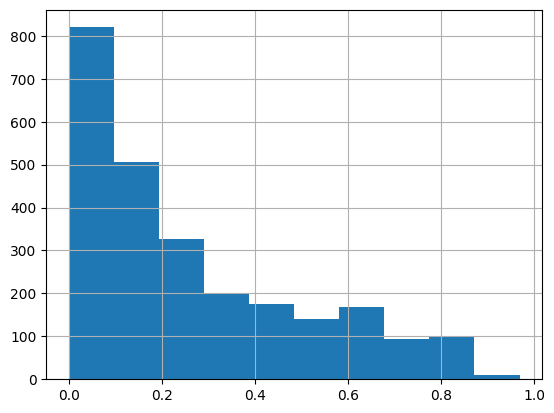

In [13]:
import matplotlib

df[k].hist()

In [14]:
print("Mean+STD")
mean_table = defaultdict(lambda:[])

for metric, df in df_collection.items():
    metric_mean = df.mean()
    metric_std = df.std()
    if 'mean' in metric:
        continue

    mean_table['metric'].append(metric)
    for k,v in metric_mean.items():
        std = df[k].std()
        table_entry = f"{v:.2f}\pm{std:.2f}"
        mean_table[k].append(table_entry)
    
mean_table = pd.DataFrame(mean_table)
# mean_table['max var dominance'] = mean_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / mean_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(mean_table, headers=mean_table.columns, floatfmt=".2f", showindex=False, tablefmt='outline'))

Mean+STD
+--------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| metric             | df1         | df2         | df3         | df4         | df5         | df6         | df7         |
+====================+=============+=============+=============+=============+=============+=============+=============+
| diff_max_v         | 0.13\pm0.16 | 0.13\pm0.16 | 0.11\pm0.14 | 0.14\pm0.18 | 0.13\pm0.16 | 0.13\pm0.16 | 0.12\pm0.15 |
| diff_max_a         | 0.18\pm0.15 | 0.16\pm0.14 | 0.15\pm0.13 | 0.18\pm0.15 | 0.16\pm0.14 | 0.16\pm0.14 | 0.15\pm0.13 |
| diff_max_d         | 0.13\pm0.13 | 0.13\pm0.13 | 0.13\pm0.12 | 0.14\pm0.14 | 0.13\pm0.13 | 0.13\pm0.12 | 0.13\pm0.12 |
| diff_max_intensity | 0.29\pm0.26 | 0.27\pm0.24 | 0.24\pm0.23 | 0.28\pm0.25 | 0.26\pm0.24 | 0.26\pm0.24 | 0.26\pm0.24 |
+--------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+


In [10]:
mean_table.T

,0,1,2,3
metric,diff_max_v,diff_max_a,diff_max_d,diff_max_intensity
df1,-0.05\pm0.20,0.03\pm0.23,-0.03\pm0.18,0.01\pm0.38
df2,-0.01\pm0.21,0.01\pm0.21,0.00\pm0.18,0.04\pm0.36
df3,-0.09\pm0.16,-0.08\pm0.18,-0.09\pm0.15,-0.14\pm0.30
df4,-0.00\pm0.23,0.02\pm0.23,0.01\pm0.20,0.02\pm0.37
df5,-0.01\pm0.21,0.01\pm0.22,0.01\pm0.18,0.04\pm0.35
df6,-0.02\pm0.20,0.00\pm0.21,-0.00\pm0.18,0.01\pm0.35


In [11]:
df['df1'].std()

0.3845142371891989

In [12]:
metric_std

df1    0.384514
df2    0.359218
df3    0.303362
df4    0.373249
df5    0.352598
df6    0.353676
dtype: float64

In [13]:
print("Median")
median_table = defaultdict(lambda:[])

for metric, df in df_collection.items():
    metric_median = df.median()

    median_table['metric'].append(metric)
    for k,v in metric_median.items():
        median_table[k].append(v)
    
median_table = pd.DataFrame(median_table)
# median_table['max var dominance'] = median_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / median_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(median_table, headers=median_table.columns, floatfmt=".3f", showindex=False, tablefmt='outline'))

Median
+--------------------+--------+--------+--------+--------+--------+--------+
| metric             |    df1 |    df2 |    df3 |    df4 |    df5 |    df6 |
+====================+========+========+========+========+========+========+
| diff_max_v         | -0.032 | -0.004 | -0.052 | -0.009 | -0.009 | -0.017 |
| diff_mean_v        | -0.051 | -0.031 | -0.067 | -0.032 | -0.030 | -0.032 |
| diff_max_a         |  0.028 |  0.000 | -0.061 |  0.006 |  0.001 |  0.000 |
| diff_mean_a        | -0.019 | -0.021 | -0.038 | -0.021 | -0.021 | -0.020 |
| diff_max_d         | -0.021 |  0.000 | -0.071 |  0.000 |  0.000 |  0.000 |
| diff_mean_d        | -0.039 | -0.025 | -0.049 | -0.025 | -0.025 | -0.025 |
| diff_max_intensity |  0.000 |  0.000 | -0.102 |  0.000 |  0.000 |  0.000 |
+--------------------+--------+--------+--------+--------+--------+--------+


In [14]:
print("Std")
std_table = defaultdict(lambda:[])

for metric, df in df_collection.items():
    metric_std = df.std()

    std_table['metric'].append(metric)
    for k,v in metric_std.items():
        std_table[k].append(v)
    
std_table = pd.DataFrame(std_table)
# std_table['max var dominance'] = std_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / std_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(std_table, headers=std_table.columns, floatfmt=".3f", showindex=False, tablefmt='outline'))

Std
+--------------------+-------+-------+-------+-------+-------+-------+
| metric             |   df1 |   df2 |   df3 |   df4 |   df5 |   df6 |
+====================+=======+=======+=======+=======+=======+=======+
| diff_max_v         | 0.203 | 0.206 | 0.158 | 0.229 | 0.212 | 0.204 |
| diff_mean_v        | 0.099 | 0.095 | 0.077 | 0.105 | 0.099 | 0.096 |
| diff_max_a         | 0.228 | 0.214 | 0.182 | 0.232 | 0.215 | 0.209 |
| diff_mean_a        | 0.070 | 0.070 | 0.058 | 0.075 | 0.070 | 0.067 |
| diff_max_d         | 0.177 | 0.182 | 0.153 | 0.202 | 0.183 | 0.176 |
| diff_mean_d        | 0.082 | 0.078 | 0.067 | 0.086 | 0.081 | 0.078 |
| diff_max_intensity | 0.385 | 0.359 | 0.303 | 0.373 | 0.353 | 0.354 |
+--------------------+-------+-------+-------+-------+-------+-------+


### Sig test, model v human

In [15]:
df

,df1,df2,df3,df4,df5,df6
0,-0.021,0.667,-0.114,0.058,-0.021,-0.021
1,-0.438,-0.547,-0.484,-0.438,-0.484,-0.547
2,-0.055,0.125,-0.070,0.195,0.125,0.125
3,0.000,-0.206,-0.315,-0.061,-0.206,-0.206
4,0.195,0.875,0.316,0.336,0.094,0.195
...,...,...,...,...,...,...
2535,-0.680,-0.531,-0.203,-0.617,-0.531,-0.516
2536,-0.500,-0.297,-0.352,0.281,-0.235,-0.189
2537,-0.680,0.000,-0.469,-0.609,0.000,0.000
2538,0.047,0.030,0.727,0.133,0.030,0.030


In [30]:
from tqdm import tqdm

print("Model vs. human significance test")
sig_thresh = 1
sig_table = defaultdict(lambda:[])
pval_table = defaultdict(lambda:[])
sig_table['model'] = ['df1', 'df2', 'df3', 'df5', 'df6']
pval_table['model'] = ['df1', 'df2', 'df3', 'df5', 'df6']

for metric, df in tqdm(df_collection.items(), desc='Running sig tests', total=len(df_collection)):

    for model in ['df1', 'df2', 'df3', 'df5', 'df6']:
        
        res = stats.ttest_ind(df[model], df['df4'], equal_var=False, permutations=10000, random_state=34)
        if res.pvalue <= sig_thresh:
            sig_table[metric].append(res.statistic)
        else:
            sig_table[metric].append(None)
        pval_table[metric].append(res.pvalue)

      
sig_table = pd.DataFrame(sig_table)
pval_table = pd.DataFrame(pval_table)
# sig_table['max var dominance'] = sig_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / sig_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(sig_table, headers=sig_table.columns, floatfmt=".3f", showindex=False, tablefmt='outline'))
print(tabulate(pval_table, headers=pval_table.columns, floatfmt=".5f", showindex=False, tablefmt='outline'))

Model vs. human significance test


Running sig tests: 100%|██████████| 7/7 [00:44<00:00,  6.42s/it]

+---------+--------------+---------------+--------------+---------------+--------------+---------------+----------------------+
| model   |   diff_max_v |   diff_mean_v |   diff_max_a |   diff_mean_a |   diff_max_d |   diff_mean_d |   diff_max_intensity |
+=========+==============+===============+==============+===============+==============+===============+======================+
| df1     |       -1.946 |         1.714 |        0.238 |        -2.573 |       -4.398 |         1.356 |                0.988 |
| df2     |       -2.374 |        -3.549 |       -3.679 |        -1.938 |       -3.510 |        -3.389 |               -1.576 |
| df3     |       -6.365 |        -1.714 |       -6.704 |        -3.943 |       -4.255 |        -2.166 |               -5.671 |
| df5     |       -1.686 |        -2.429 |       -3.505 |        -1.786 |       -3.672 |        -2.322 |               -2.690 |
| df6     |       -2.378 |        -3.101 |       -4.400 |        -3.446 |       -4.788 |        -3.645 |

In [31]:
from tqdm import tqdm

print("Model vs. human significance test")
sig_thresh = .05
sig_table = defaultdict(lambda:[])
pval_table = defaultdict(lambda:[])
# sig_table['model'] = ['df1', 'df2', 'df3']
# pval_table['model'] = ['df1', 'df2', 'df3']

for metric, df in tqdm(df_collection.items(), desc='Running sig tests', total=len(df_collection)):

    for model in ['df1', 'df2', 'df3', 'df5', 'df6']:
        for model2 in ['df1', 'df2', 'df3', 'df5', 'df6']:
            if model == model2:
                continue
            if f"{model} vs. {model2}" not in sig_table['pair']:
                sig_table['pair'].append(f"{model} vs. {model2}")
                pval_table['pair'].append(f"{model} vs. {model2}")


        
            res = stats.ttest_ind(df[model], df[model2], equal_var=False, permutations=10000, random_state=34)
            if res.pvalue <= sig_thresh:
                sig_table[metric].append(res.statistic)
            else:
                sig_table[metric].append(None)
            pval_table[metric].append(res.pvalue)

      
sig_table = pd.DataFrame(sig_table)
pval_table = pd.DataFrame(pval_table)
# sig_table['max var dominance'] = sig_table[['df1','df2','df3','df4']].max(axis=1, numeric_only=True) / sig_table[['df1','df2','df3','df4']].min(axis=1, numeric_only=True)
print(tabulate(sig_table, headers=sig_table.columns, floatfmt=".3f", showindex=False, tablefmt='outline'))
print(tabulate(pval_table, headers=pval_table.columns, floatfmt=".5f", showindex=False, tablefmt='outline'))

Model vs. human significance test


Running sig tests: 100%|██████████| 7/7 [03:02<00:00, 26.06s/it]

+-------------+--------------+---------------+--------------+---------------+--------------+---------------+----------------------+
| pair        |   diff_max_v |   diff_mean_v |   diff_max_a |   diff_mean_a | diff_max_d   |   diff_mean_d |   diff_max_intensity |
+=============+==============+===============+==============+===============+==============+===============+======================+
| df1 vs. df2 |      nan     |         5.409 |        4.006 |       nan     |              |         4.850 |                2.552 |
| df1 vs. df3 |        4.613 |         3.592 |        7.113 |       nan     |              |         3.640 |                6.598 |
| df1 vs. df5 |      nan     |         4.231 |        3.827 |       nan     |              |         3.752 |                3.650 |
| df1 vs. df6 |      nan     |         4.956 |        4.749 |       nan     |              |         5.108 |                4.072 |
| df2 vs. df1 |      nan     |        -5.409 |       -4.006 |       nan     

+-------------+--------------+---------------+--------------+---------------+--------------+---------------+----------------------+
| pair        |   diff_max_v |   diff_mean_v |   diff_max_a |   diff_mean_a |   diff_max_d |   diff_mean_d |   diff_max_intensity |
+=============+==============+===============+==============+===============+==============+===============+======================+
| df1 vs. df2 |        0.451 |         5.409 |        4.006 |        -0.690 |       -0.916 |         4.850 |                2.552 |
| df1 vs. df3 |        4.613 |         3.592 |        7.113 |         1.254 |       -0.179 |         3.640 |                6.598 |
| df2 vs. df3 |        4.144 |        -2.045 |        3.044 |         2.011 |        0.745 |        -1.361 |                4.120 |
+-------------+--------------+---------------+--------------+---------------+--------------+---------------+----------------------+
+-------------+--------------+---------------+--------------+---------------+--------------+---------------+----------------------+
| pair        |   diff_max_v |   diff_mean_v |   diff_max_a |   diff_mean_a |   diff_max_d |   diff_mean_d |   diff_max_intensity |
+=============+==============+===============+==============+===============+==============+===============+======================+
| df1 vs. df2 |      0.64554 |       0.00010 |      0.00010 |       0.49785 |      0.35906 |       0.00010 |              0.01000 |
| df1 vs. df3 |      0.00010 |       0.00060 |      0.00010 |       0.21158 |      0.86291 |       0.00060 |              0.00010 |
| df2 vs. df3 |      0.00030 |       0.03870 |      0.00330 |       0.04330 |      0.44046 |       0.16988 |              0.00020 |
+-------------+--------------+---------------+--------------+---------------+--------------+---------------+----------------------+

In [46]:
2538/2540
806/2540

0.3173228346456693

In [45]:
2927 / 20074

0.1458105011457607

In [47]:
2085 / 9437

0.2209388576878245

In [48]:
2529/2540

0.9956692913385827

In [49]:
5339 / 29080

0.18359697386519944

In [50]:
788/2540

0.3102362204724409